<a href="https://colab.research.google.com/github/Danie110001001109192912/Cancer_prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Prediction

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

The study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

The researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. They also found that the risk was higher in nonsmokers than smokers, and that the risk increased with age.

While this study does not prove that air pollution causes lung cancer, it does suggest that there may be a link between the two. More research is needed to confirm these findings and to determine what effect different types and levels of air pollution may have on lung cancer risk

Importing library

In [28]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Predição Binarária

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


Dowloading datasets


In [6]:
kjson = pd.read_json('/content/drive/MyDrive/Colab Notebooks/kaggle.json', typ = 'series')

os.environ['KAGGLE_USERNAME'] = 'danielduarte2423421'
os.environ['KAGGLE_KEY'] = kjson.key

! kaggle datasets download --force thedevastator/cancer-patients-and-air-pollution-a-new-link
# what exacly this command works ?
# https://www.kaggle.com/code/rajputmonalharising/lung-cancer-prediction

  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 13.7MB/s]


In [7]:
pasc = pd.read_csv('/content/cancer-patients-and-air-pollution-a-new-link.zip')

In [8]:
pasc.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
pasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#limpeza

In [10]:
pasc.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [11]:
pasc.duplicated().sum()

0

In [12]:
pasc['Patient Id'].duplicated().sum()

0

#EDA

<ipython-input-13-c5089d5e9a1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlação = pasc.corr()


<Axes: >

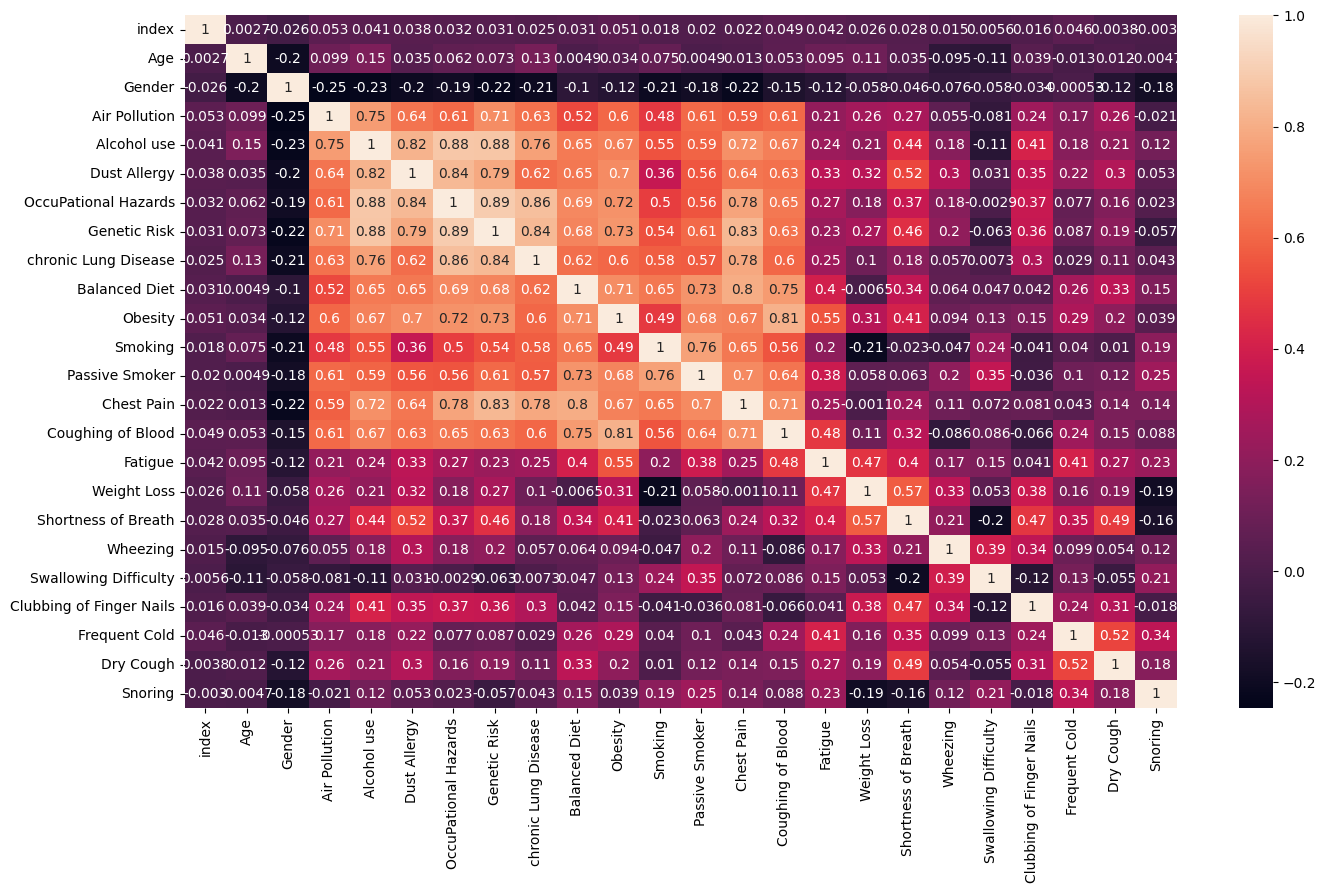

In [13]:
correlação = pasc.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(correlação, annot= True)

<Axes: >

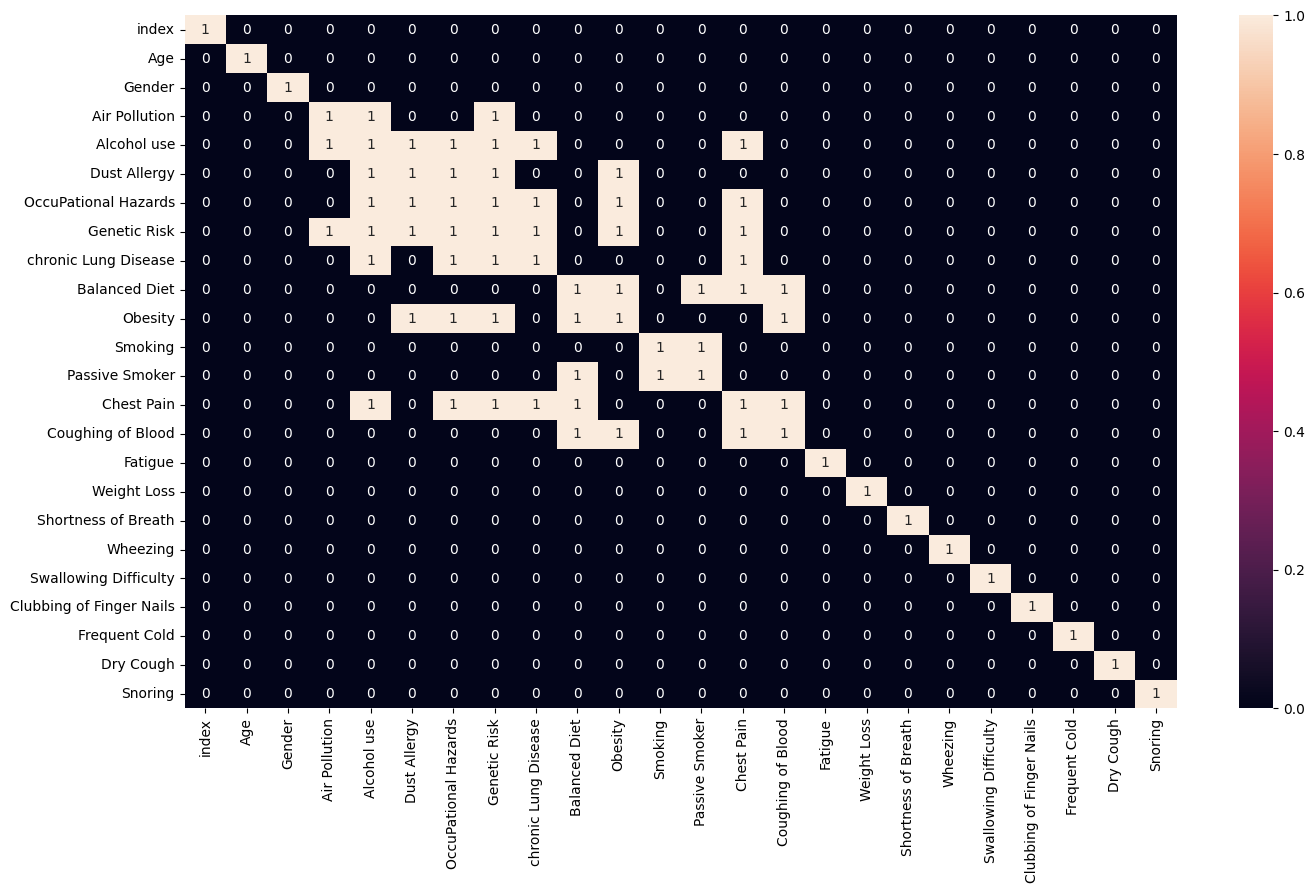

In [14]:
cor_alta = correlação >= 0.7
plt.figure( figsize = (16,9))
sns.heatmap(cor_alta, annot= True)

In [15]:
corr_07 = ['Level', 'Alcohol use',
          'OccuPational Hazards', 'Genetic Risk', 'Chest Pain', 'chronic Lung Disease', 'Air Pollution']

<Figure size 1600x900 with 0 Axes>

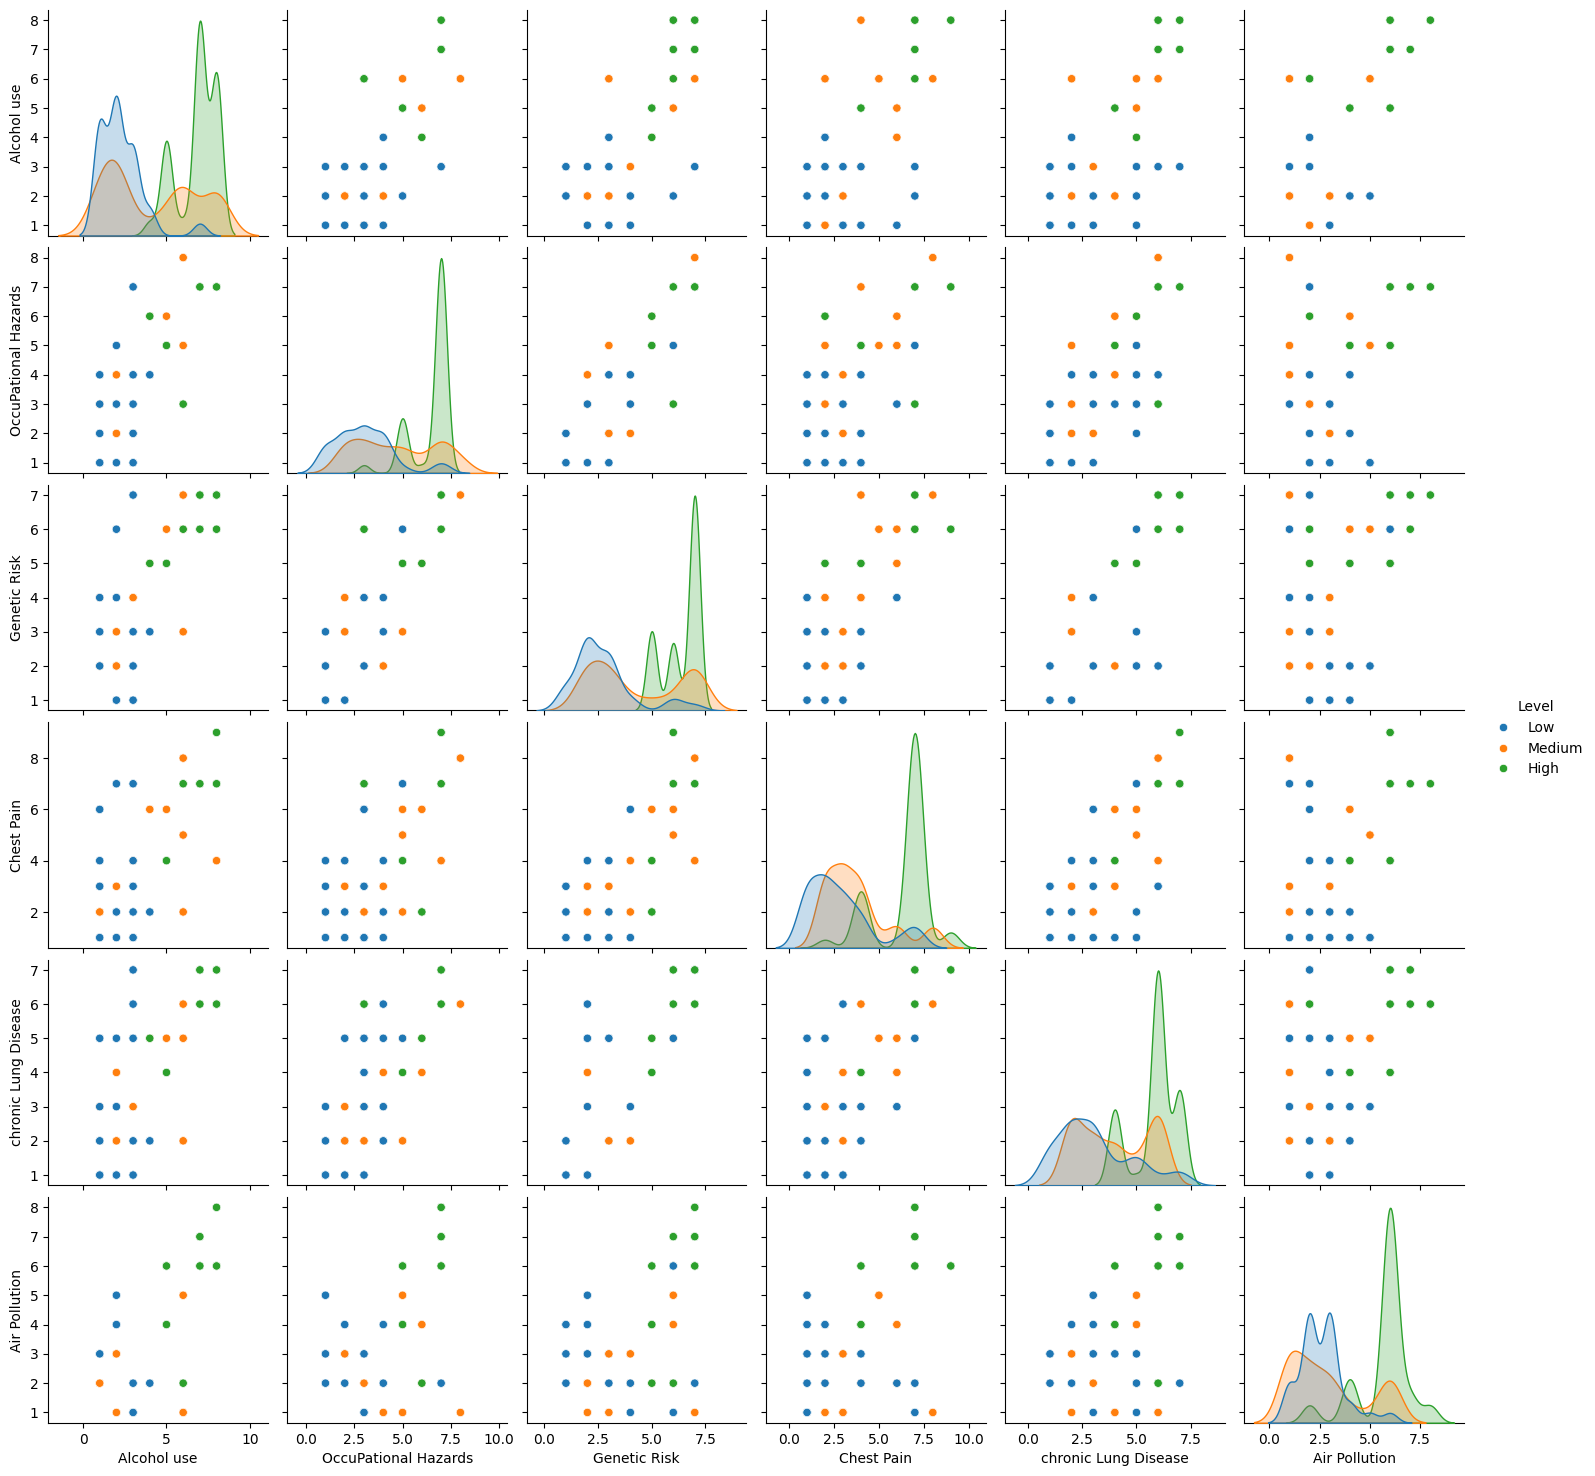

In [16]:
plt.figure( figsize = (16,9))
sns.pairplot(data = pasc[corr_07], hue = 'Level')
plt.show()

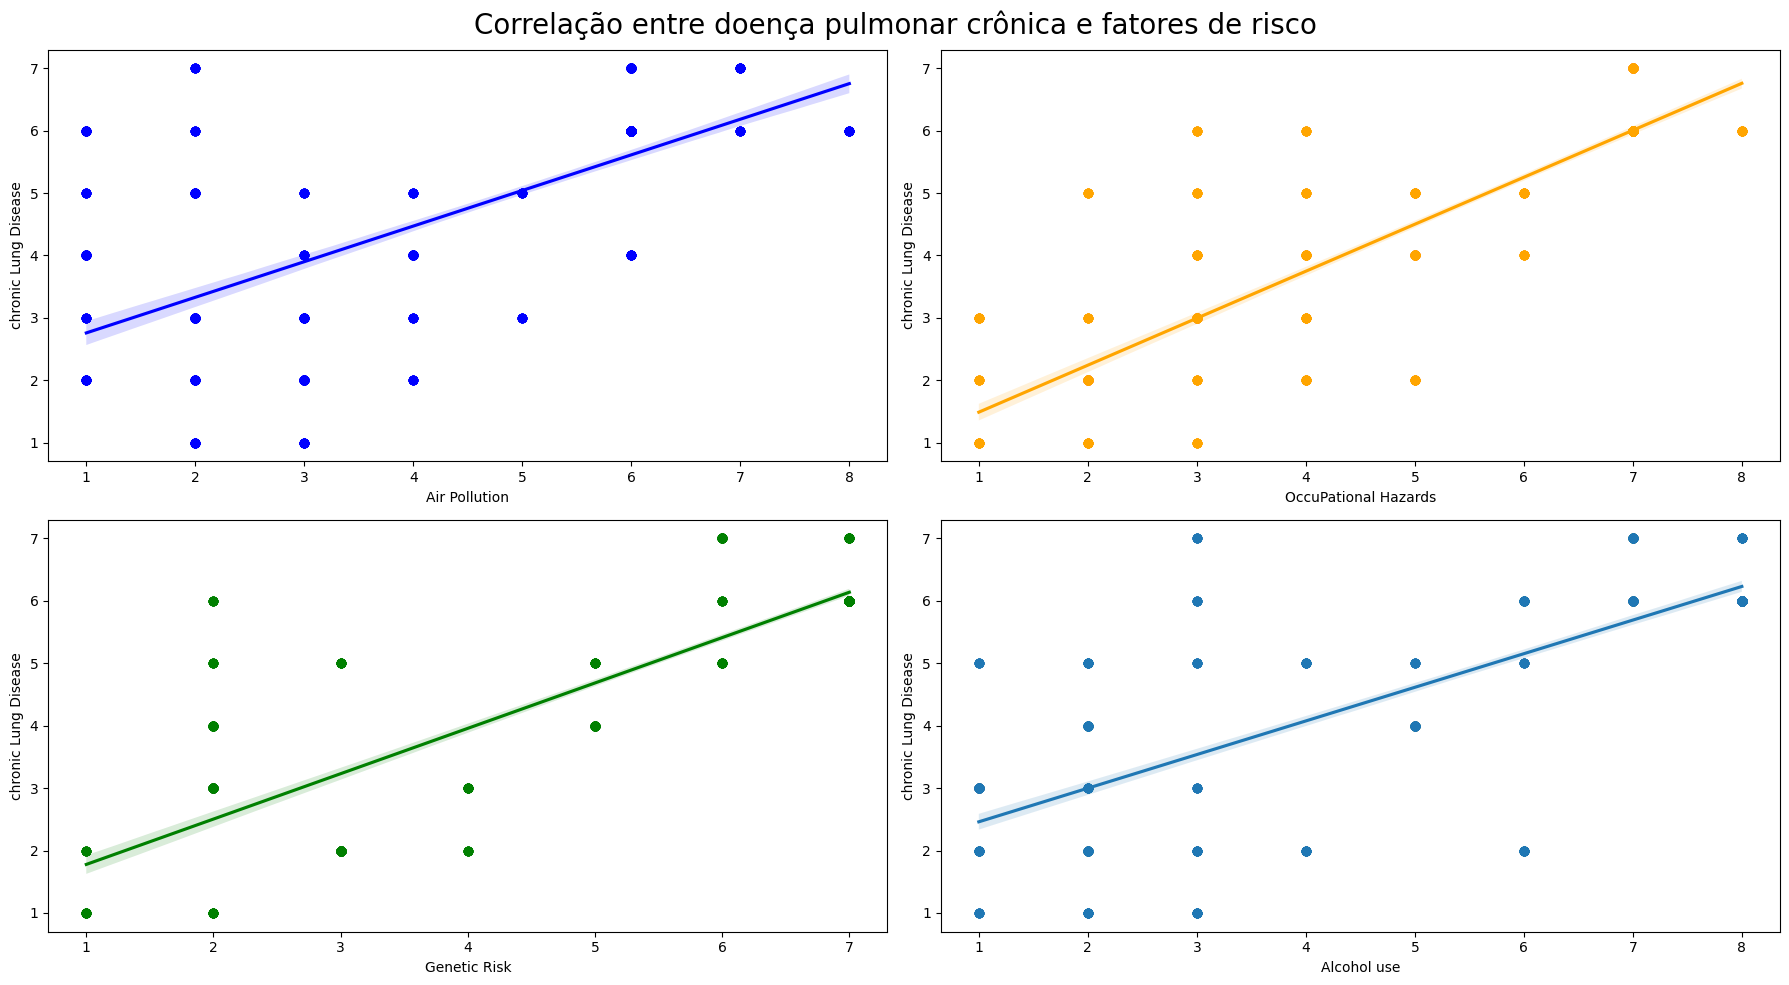

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))


# o lmplot não funciona para essa representação
fig.suptitle('Correlação entre doença pulmonar crônica e fatores de risco', fontsize=20)

sns.regplot( ax=axes[0,0], data = pasc, y = 'chronic Lung Disease', x = 'Air Pollution', color = 'blue')
sns.regplot( ax=axes[0,1], data = pasc, y = 'chronic Lung Disease', x = 'OccuPational Hazards',color='orange')
sns.regplot( ax=axes[1,0], data = pasc, y = 'chronic Lung Disease', x = 'Genetic Risk', color='green')
sns.regplot( ax=axes[1,1], data = pasc, y = 'chronic Lung Disease', x = 'Alcohol use')


plt.tight_layout()

plt.show()

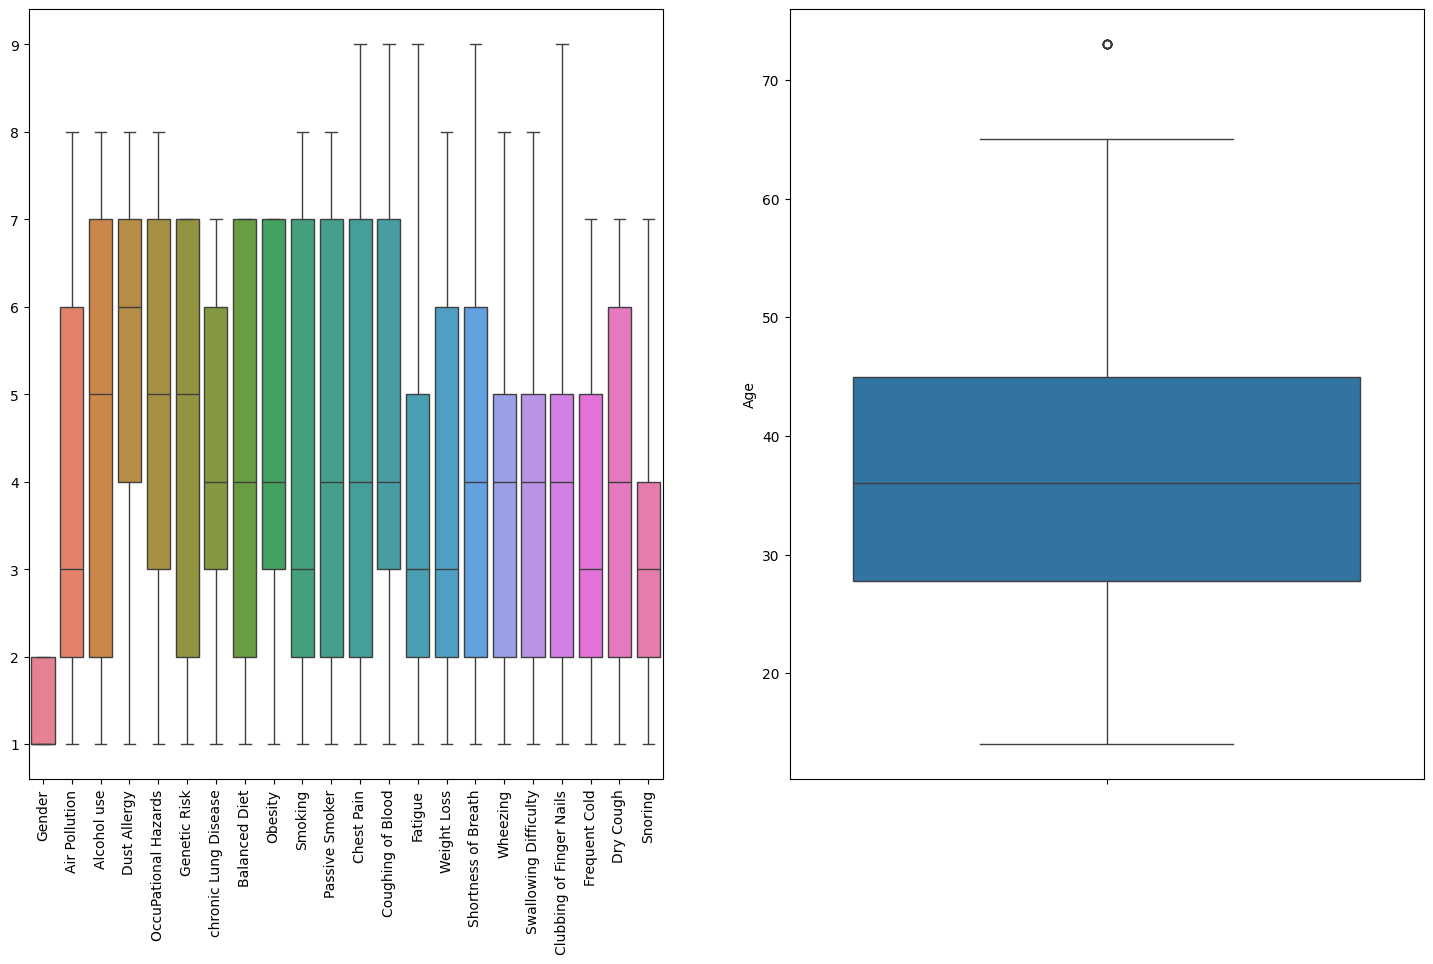

In [18]:
fig, axe = plt.subplots(1, 2, figsize=(18, 10))

c = ['index', 'Age']

sns.boxplot(ax=axe[0], data = pasc.drop(columns = c) )
axe[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axe[1], data = pasc['Age'])

plt.show()

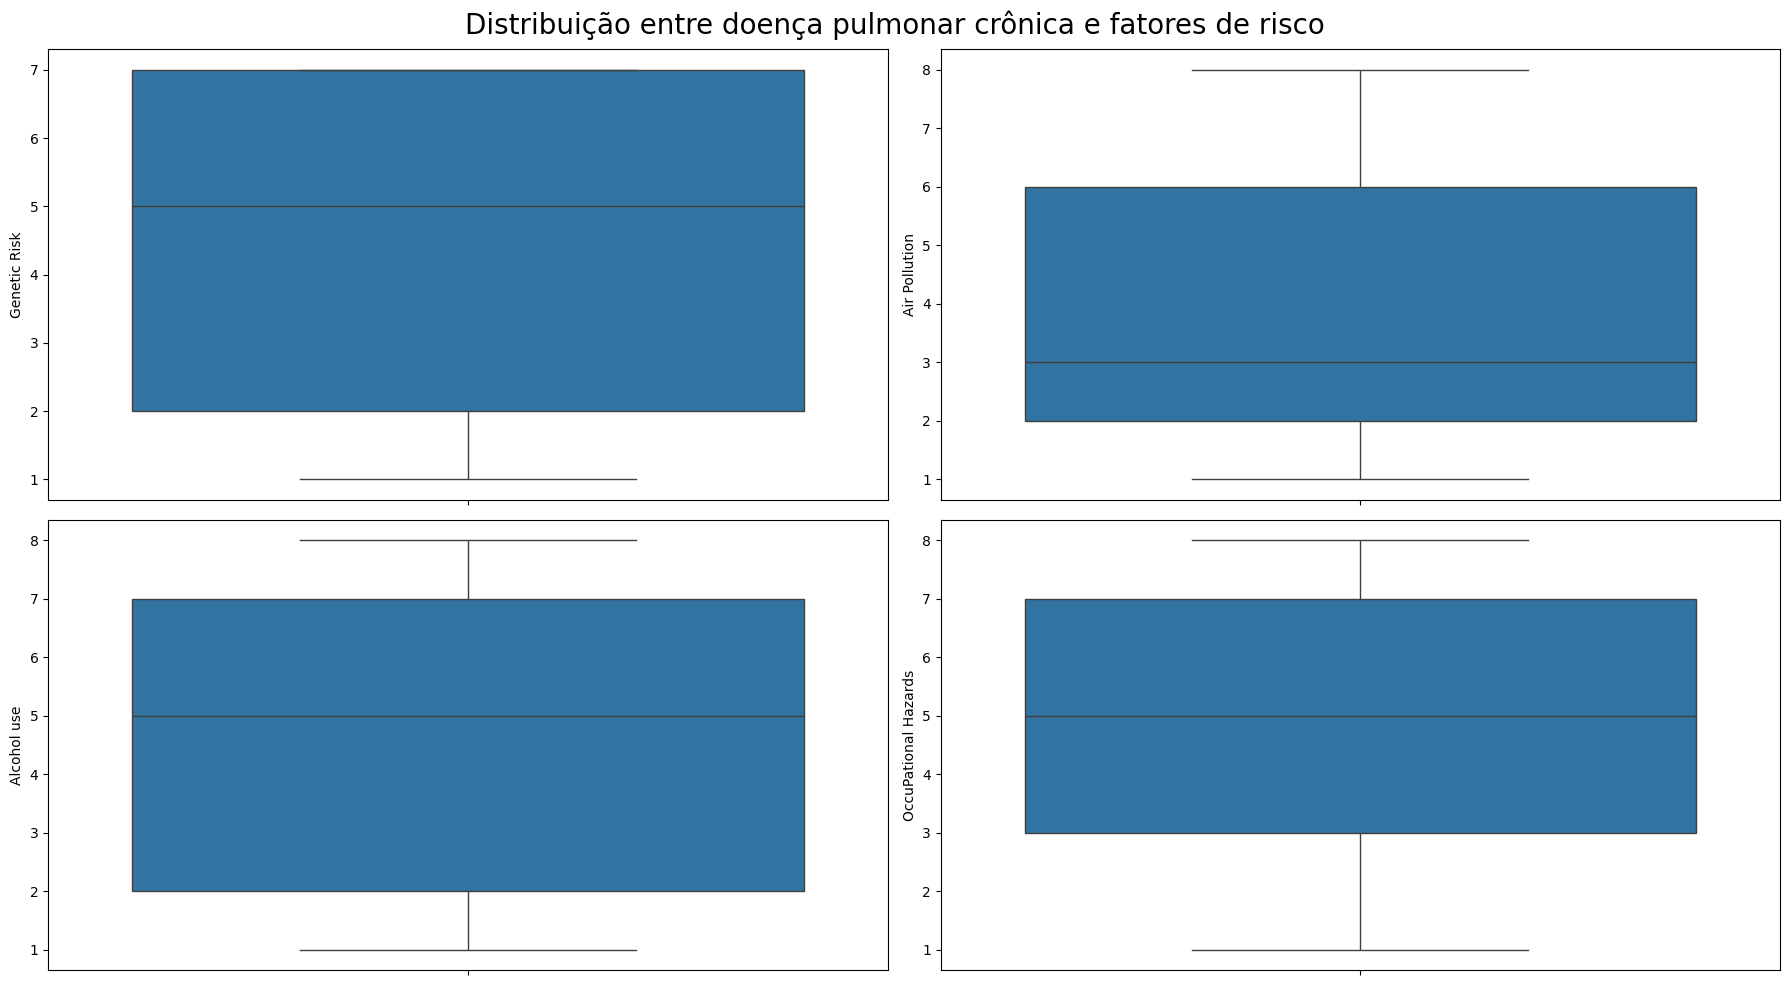

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))


# o lmplot não funciona para essa representação
fig.suptitle('Distribuição entre doença pulmonar crônica e fatores de risco', fontsize=20)


sns.boxplot( ax=axes[0,0], data = pasc['Genetic Risk'])
sns.boxplot( ax=axes[0,1], data = pasc['Air Pollution'])
sns.boxplot( ax=axes[1,0], data = pasc['Alcohol use'])
sns.boxplot( ax=axes[1,1], data = pasc['OccuPational Hazards'])

plt.tight_layout()

plt.show()

#classificação Binária

* alvo é chronic lung disease



## SMV

In [20]:
pasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [21]:
# fig, axes = plt.subplots(1,2, figsize = (16,9))

target = pasc["chronic Lung Disease"].value_counts()
proporcao = (target[6] / target.values.sum()) * 100
proporcao

print(f'A porcentagem de pessoas com câncer com nivel 6 neste dataset é {proporcao} %')

A porcentagem de pessoas com câncer com nivel 6 neste dataset é 30.8 %


Lable inconding

In [22]:
pasc1 = pasc

pasc1['chronic Lung Disease']  = pasc1['chronic Lung Disease'].replace([1,2,3,4,5,7], 0)
pasc1['chronic Lung Disease']  = pasc1['chronic Lung Disease'].replace([6], 1)
pasc1['chronic Lung Disease'].value_counts()




0    692
1    308
Name: chronic Lung Disease, dtype: int64

Trasformando

In [23]:
X = pasc1.drop(columns = ["index", "Patient Id" ,"chronic Lung Disease", "Level"])
X.columns


Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring'],
      dtype='object')

In [46]:
y = pasc1['chronic Lung Disease']
y.value_counts()

0    692
1    308
Name: chronic Lung Disease, dtype: int64

> Train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

print(f' X e Y de treino é respectivamente {X_train.shape, y_train.shape}\n X e Y de teste é respectivamente{X_test.shape, y_test.shape}')

 X e Y de treino é respectivamente ((670, 22), (670,))
 X e Y de teste é respectivamente((330, 22), (330,))


> Scaler


In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


> Machine learning

In [49]:
# SVM

svc = SVC(probability = True)
svc.fit(X_train_scaled, y_train)

pred = svc.predict(X_test_scaled)
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

> Medindo a provabilidade de cada valor predito está correto

In [50]:
prob = svc.predict_proba(X_test_scaled)
prob[:10]

array([[1.02781809e-06, 9.99998972e-01],
       [6.51552742e-07, 9.99999348e-01],
       [1.02905467e-06, 9.99998971e-01],
       [9.92753846e-01, 7.24615407e-03],
       [9.92759273e-01, 7.24072698e-03],
       [9.92752958e-01, 7.24704191e-03],
       [6.51552742e-07, 9.99999348e-01],
       [9.93104031e-01, 6.89596922e-03],
       [1.02965456e-06, 9.99998970e-01],
       [1.02874626e-06, 9.99998971e-01]])

<Axes: >

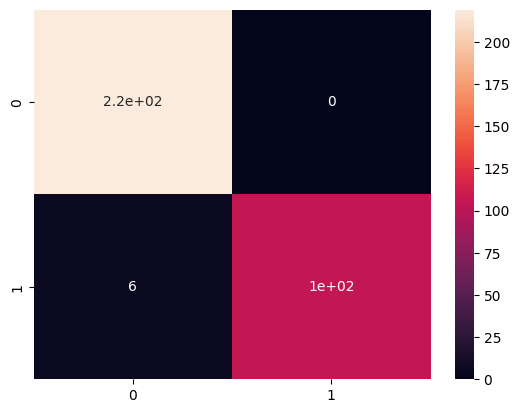

In [51]:
confusion_matrix(y_test,pred)

sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [52]:
print(classification_report(y_test,pred ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       219
           1       1.00      0.95      0.97       111

    accuracy                           0.98       330
   macro avg       0.99      0.97      0.98       330
weighted avg       0.98      0.98      0.98       330



## curva ROC

É um gráfico com o objetivo de plotar gráficamente a acuracia do modelo

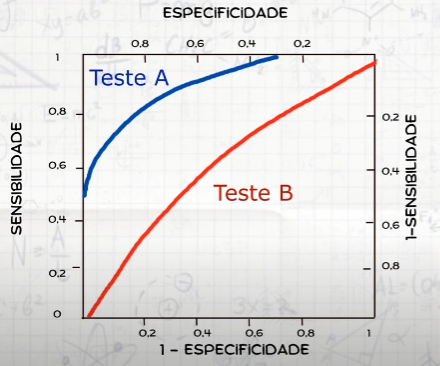



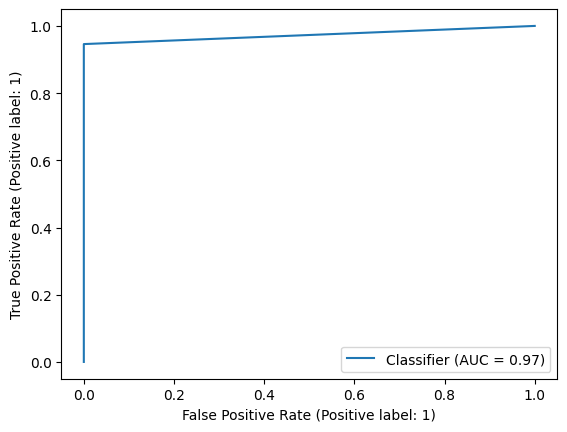

In [53]:
RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

* testar varios algoritimos e escolher o melhor com a otimização

## RamdomFrorest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#trinando o modelo
rf.fit(X_train, y_train)

# testando

y_rf_pred = rf.predict(X_test)
y_rf_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [93]:
rf_prob = rf.predict_proba(X_test)
rf_prob[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [94]:
print(classification_report(y_test, y_rf_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       111

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



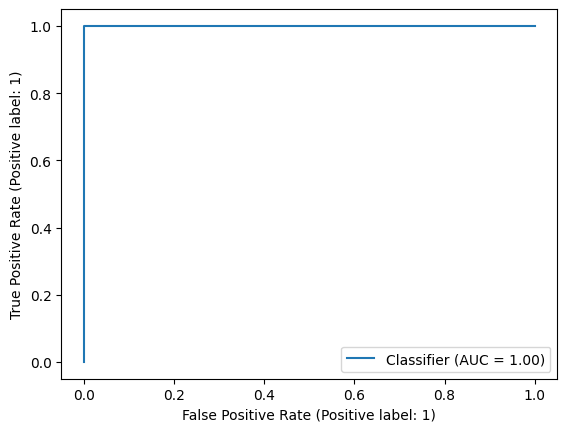

In [95]:
RocCurveDisplay.from_predictions(y_test, rf_pred)
plt.show()